In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Q-1.A

Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Apple
Euclidean: 35.00, Manhattan: 35.50, Minkowski: 35.00, Label: Apple
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Orange
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Orange
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Apple
Euclidean: 25.12, Manhattan: 27.50, Minkowski: 25.01, Label: Orange
Predicted label with k=1: Orange
Predicted label with k=5: Orange
Predicted label with k=3: Apple


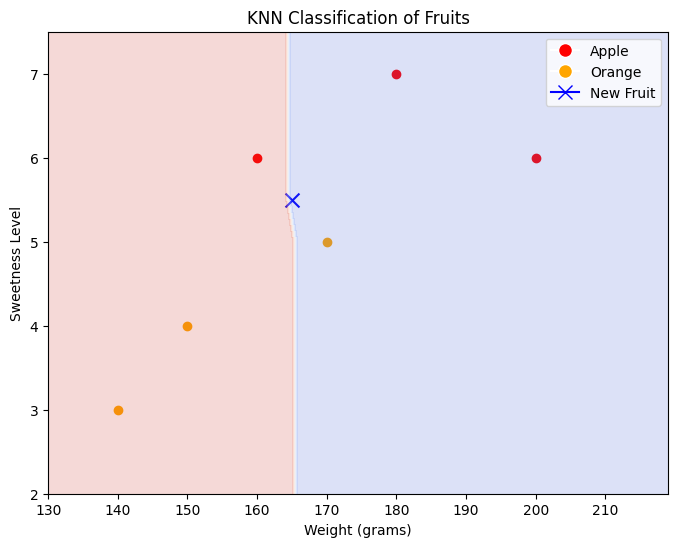

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
weights = np.array([180, 200, 150, 170, 160, 140])
sweetness_levels = np.array([7, 6, 4, 5, 6, 3])
labels = np.array(['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange'])

# New fruit features
new_fruit = np.array([165, 5.5])

# Function to calculate distances
def calculate_distances(weights, sweetness_levels, new_fruit):
    distances = []
    for weight, sweetness, label in zip(weights, sweetness_levels, labels):
        euclidean_distance = np.sqrt((weight - new_fruit[0])**2 + (sweetness - new_fruit[1])**2)
        manhattan_distance = abs(weight - new_fruit[0]) + abs(sweetness - new_fruit[1])
        minkowski_distance = (abs(weight - new_fruit[0])**3 + abs(sweetness - new_fruit[1])**3)**(1/3)
        distances.append((euclidean_distance, manhattan_distance, minkowski_distance, label))
    return distances

# Calculate distances
distances = calculate_distances(weights, sweetness_levels, new_fruit)

# Print distances
for d in distances:
    print(f'Euclidean: {d[0]:.2f}, Manhattan: {d[1]:.2f}, Minkowski: {d[2]:.2f}, Label: {d[3]}')

# Step 3: Determine the label for the new fruit using k=3
k = 3
# sorted_distances = sorted(distances, key=lambda x: x[0])  # sort by Euclidean distance
# nearest_labels = [label for _, _, _, label in sorted_distances[:k]]

# Majority voting without Counter
# vote_count = {}
# for label in nearest_labels:
#     if label in vote_count:
#         vote_count[label] += 1
#     else:
#         vote_count[label] = 1

# Get the label with the highest count
# vote = max(vote_count, key=vote_count.get)
# print(f'The predicted label for the new fruit is: {vote}')

# Step 4: Effect of different k values
def classify_with_k(weights, sweetness_levels, labels, new_fruit, k):
    distances = calculate_distances(weights, sweetness_levels, new_fruit)
    sorted_distances = sorted(distances, key=lambda x: x[0])  # sort by Euclidean distance
    nearest_labels = [label for _, _, _, label in sorted_distances[:k]]
    
    # Majority voting without Counter
    vote_count = {}
    for label in nearest_labels:
        if label in vote_count:
            vote_count[label] += 1
        else:
            vote_count[label] = 1

    vote = max(vote_count, key=vote_count.get)
    return vote
    

print(f'Predicted label with k=1: {classify_with_k(weights, sweetness_levels, labels, new_fruit, 1)}')
print(f'Predicted label with k=5: {classify_with_k(weights, sweetness_levels, labels, new_fruit, 5)}')
print(f'Predicted label with k=3: {classify_with_k(weights, sweetness_levels, labels, new_fruit, 3)}')

# Step 5: Plotting the samples and decision boundary
plt.figure(figsize=(8, 6))
colors = {'Apple': 'red', 'Orange': 'orange', 'New Fruit': 'blue'}

# Plot existing fruits
for weight, sweetness, label in zip(weights, sweetness_levels, labels):
    plt.scatter(weight, sweetness, color=colors[label])

# Plot the new fruit
plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')

# Decision boundary - Create a grid
x_min, x_max = 130, 220
y_min, y_max = 2, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.5))

# Convert labels to numerical values for the decision boundary
label_to_num = {'Apple': 0, 'Orange': 1}
Z = np.array([classify_with_k(weights, sweetness_levels, labels, np.array([x, y]), k) for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z_numeric = np.array([label_to_num[label] for label in Z])

# Reshape the Z array for contour plotting
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_numeric, alpha=0.2, cmap='coolwarm')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification of Fruits')

# Custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Apple'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Orange'),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='blue', markersize=10, label='New Fruit')
]
plt.legend(handles=handles)

plt.show()


### Q-1.B

C:\Users\Reliance Digital\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Reliance Digital\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


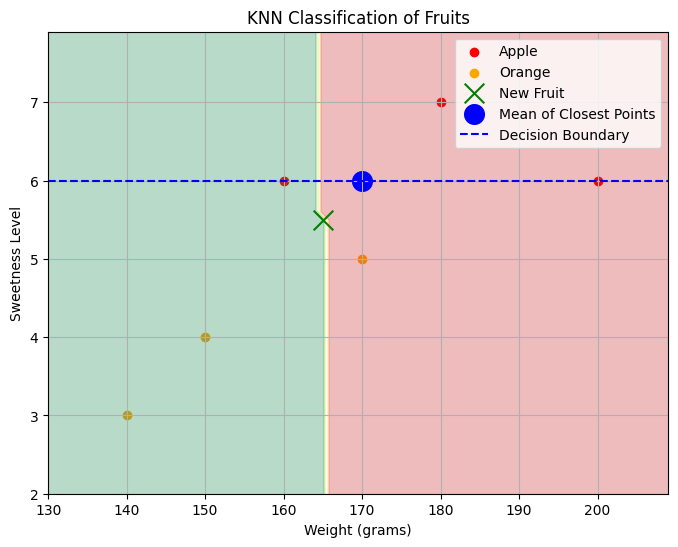

Distances:
Euclidean: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski (p=3): [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]
The new fruit is categorized as: Orange


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

data = {
    'W': [180, 200, 150, 170, 160, 140],
    'S': [7, 6, 4, 5, 6, 3],
    'L': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']
}
df = pd.DataFrame(data)

X = df[['W', 'S']]
y = df['L'].map({'Apple': 0, 'Orange': 1})  
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

nf = np.array([[165, 5.5]])
distances = pairwise_distances(X, nf)
closest_indices = np.argsort(distances.flatten())[:k]
mean_closest = X.iloc[closest_indices].mean(axis=0)

plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'orange'}
for label in colors.keys():
    subset = df[df['L'].map({'Apple': 0, 'Orange': 1}) == label]
    plt.scatter(subset['W'], subset['S'], color=colors[label], label='Apple' if label == 0 else 'Orange')

x_min, x_max = X['W'].min() - 10, X['W'].max() + 10
y_min, y_max = X['S'].min() - 1, X['S'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
plt.scatter(nf[0][0], nf[0][1], color='green', marker='x', s=200, label='New Fruit')
plt.scatter(mean_closest['W'], mean_closest['S'], color='blue', marker='o', s=200, label='Mean of Closest Points')

pred_label = knn.predict(nf)[0]
fruit_cat = 'Apple' if pred_label == 0 else 'Orange'
plt.axhline(y=mean_closest['S'], color='blue', linestyle='--', label='Decision Boundary')

plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification of Fruits')
plt.legend()
plt.grid()
plt.show()

dist_euclidean = pairwise_distances(X, nf, metric='euclidean')
dist_manhattan = pairwise_distances(X, nf, metric='manhattan')
dist_minkowski = pairwise_distances(X, nf, metric='minkowski', p=3)

print("Distances:")
print("Euclidean:", dist_euclidean.flatten())
print("Manhattan:", dist_manhattan.flatten())
print("Minkowski (p=3):", dist_minkowski.flatten())
print(f'The new fruit is categorized as: {fruit_cat}')


### Q-2.A

In [14]:
import math
from collections import Counter

# Calculate entropy
def entropy(counts):
    total = sum(counts)
    return -sum((count / total) * math.log2(count / total) for count in counts if count > 0)

# Calculate information gain
def information_gain(data, feature_index):
    total_entropy = entropy([sum(row[-1] == "Healthy" for row in data), sum(row[-1] == "Sick" for row in data)])
    feature_values = set(row[feature_index] for row in data)
    weighted_entropy = sum(
        (len(subset) / len(data)) * entropy([sum(row[-1] == "Healthy" for row in subset), sum(row[-1] == "Sick" for row in subset)])
        for subset in ([row for row in data if row[feature_index] == value] for value in feature_values)
    )
    return total_entropy - weighted_entropy

# Build the decision tree
def build_tree(data, features):
    labels = [row[-1] for row in data]
    if len(set(labels)) == 1:
        return labels[0]  # Return single class label as leaf node
    if not features:
        return Counter(labels).most_common(1)[0][0]  # Return majority class as leaf node

    # Find best feature to split on
    gains = [(information_gain(data, f), f) for f in features]
    best_gain, best_feature = max(gains, key=lambda x: x[0])
    if best_gain == 0:
        return Counter(labels).most_common(1)[0][0]  # Return majority class if no gain

    # Build tree for best feature with values mapped directly to class labels
    tree = {}
    feature_values = set(row[best_feature] for row in data)
    for value in feature_values:
        subset = [row for row in data if row[best_feature] == value]
        remaining_features = [f for f in features if f != best_feature]
        tree[value] = build_tree(subset, remaining_features)
    return {best_feature: tree}

# Prediction function
def predict(tree, instance):
    if not isinstance(tree, dict):  # If it's a leaf node, return the result
        return tree
    feature = next(iter(tree))
    feature_value = instance[feature]
    subtree = tree[feature].get(feature_value)
    return predict(subtree, instance) if subtree else "Unknown"

# Example data
data = [
    [1, 30, "High", "Sick"],
    [2, 45, "Low", "Healthy"],
    [3, 50, "High", "Sick"],
    [4, 35, "Low", "Healthy"],
    [5, 60, "High", "Sick"],
    [6, 55, "Low", "Healthy"],
    [7, 40, "High", "Sick"],
    [8, 25, "Low", "Healthy"],
    [9, 65, "High", "Sick"],
    [10, 45, "Low", "Healthy"]
]

# Build tree and make prediction
features = [1, 2]  # Feature indices for "Age" and "Blood Pressure"
tree = build_tree(data, features)
new_patient = [None, 50, "Low", None]
prediction = predict(tree, new_patient)
print(f"Prediction for new patient: {prediction}")

# Print the tree in a readable format
def print_tree(tree, depth=0):
    if not isinstance(tree, dict):  # Leaf node
        print(f"{'  ' * depth}Predict: {tree}")
    else:
        feature = next(iter(tree))
        print(f"Feature {feature}:")
        for value, subtree in tree[feature].items():
            print(f"{'  ' * (depth + 1)}If value = {value}:")
            if isinstance(subtree, dict):
                print_tree(subtree, depth + 2)
            else:
                print(f"{'  ' * (depth + 2)}Predict: {subtree}")

# Display the constructed tree
print("\nDecision Tree Structure:")
print_tree(tree)


Prediction for new patient: Sick

Decision Tree Structure:
Feature 1:
  If value = 65:
    Predict: Sick
  If value = 35:
    Predict: Healthy
  If value = 40:
    Predict: Sick
  If value = 45:
    Predict: Healthy
  If value = 50:
    Predict: Sick
  If value = 55:
    Predict: Healthy
  If value = 25:
    Predict: Healthy
  If value = 60:
    Predict: Sick
  If value = 30:
    Predict: Sick


### Q-2.B

Encoded Features:
    age_years  bp_high_low_Low  cholesterol_high_normal_Normal
0         30            False                           False
1         45             True                            True
2         50            False                           False
3         35             True                            True
4         60            False                           False
5         55             True                            True
6         40            False                           False
7         25             True                            True
8         65            False                           False
9         45             True                            True


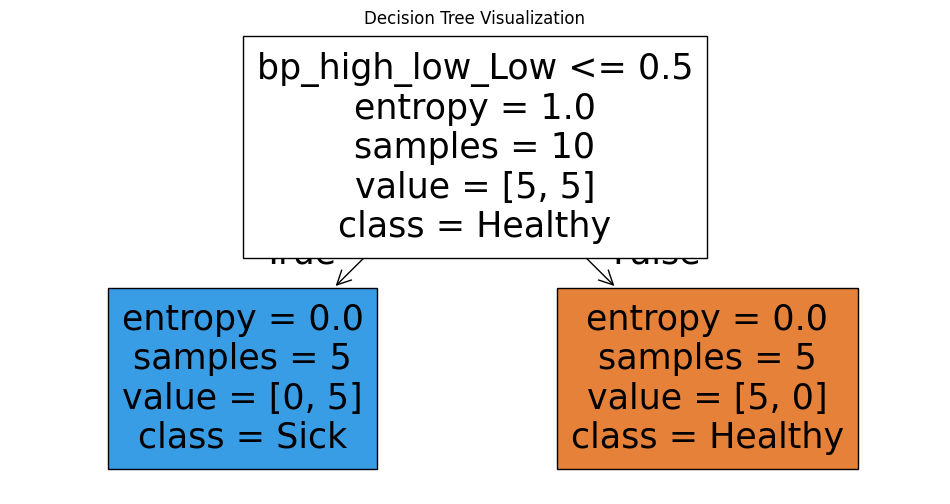

Decision Tree Structure:
 |--- bp_high_low_Low <= 0.50
|   |--- class: Sick
|--- bp_high_low_Low >  0.50
|   |--- class: Healthy

Prediction for the new patient (50 years, Low BP, Normal Cholesterol): Healthy


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

data = {
    'age_years': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'bp_high_low': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'cholesterol_high_normal': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

features = df[['age_years', 'bp_high_low', 'cholesterol_high_normal']]
target = df['diagnosis']

features_encoded = pd.get_dummies(features, drop_first=True)
print("Encoded Features:\n", features_encoded)

decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree.fit(features_encoded, target)

plt.figure(figsize=(12, 6))
plot_tree(decision_tree, feature_names=features_encoded.columns, class_names=['Healthy', 'Sick'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

tree_structure = export_text(decision_tree, feature_names=list(features_encoded.columns))
print("Decision Tree Structure:\n", tree_structure)

new_patient_data = pd.DataFrame({
    'age_years': [50],
    'bp_high_low_Low': [1],
    'bp_high_low_High': [0],
    'cholesterol_high_normal_Normal': [1],
    'cholesterol_high_normal_High': [0]
})

new_patient_data = new_patient_data.reindex(columns=features_encoded.columns, fill_value=0)

prediction = decision_tree.predict(new_patient_data)
print(f'Prediction for the new patient (50 years, Low BP, Normal Cholesterol): {prediction[0]}')


### Additional Questions

### Q-1.

Euclidean: 4.00, Manhatten: 4.00, Minkowski: 4.00, Label: Bad
Euclidean: 5.00, Manhatten: 7.00, Minkowski: 4.50, Label: Bad
Euclidean: 3.00, Manhatten: 3.00, Minkowski: 3.00, Label: Good
Euclidean: 3.61, Manhatten: 5.00, Minkowski: 3.27, Label: Good
Euclidean: 2.24, Manhatten: 3.00, Minkowski: 2.08, Label: Bad
Euclidean: 2.00, Manhatten: 2.00, Minkowski: 2.00, Label: Good
Euclidean: 1.41, Manhatten: 2.00, Minkowski: 1.26, Label: Bad
Euclidean: 5.00, Manhatten: 5.00, Minkowski: 5.00, Label: Bad
Euclidean: 4.47, Manhatten: 6.00, Minkowski: 4.16, Label: Good
Euclidean: 5.10, Manhatten: 6.00, Minkowski: 5.01, Label: Bad
The predicted label for the new instance is: Bad
Predicted label with k=1: Bad
Predicted label with k=3: Bad
Predicted label with k=5: Good


TypeError: 'numpy.int64' object is not iterable

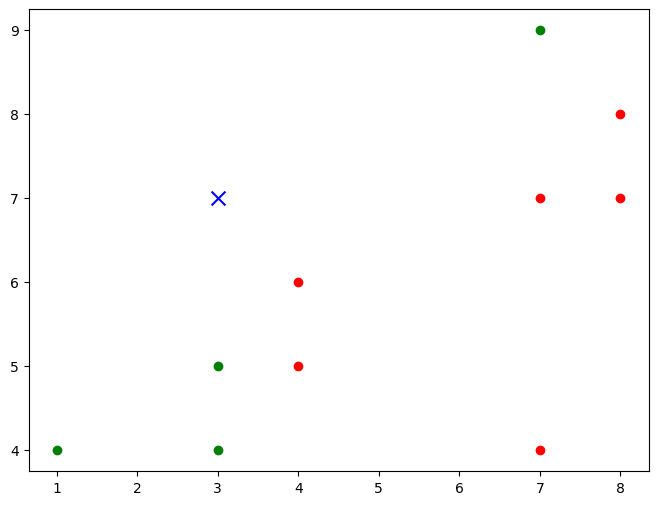

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
durability = np.array([7,7,3,1,4,3,4,8,7,8])
strength = np.array([7,4,4,4,5,5,6,7,9,8])
labels = np.array(['Bad','Bad','Good','Good','Bad','Good','Bad','Bad','Good','Bad'])

# New acid features
new_instance = np.array([3,7])

# Function to calculate distances
def calculate_distances(durabilities, strengths, new_instance):
    distances = []
    for dur, stre, label in zip(durabilities, strengths, labels):
        euclidean_distance = np.sqrt((dur - new_instance[0])**2 + (stre - new_instance[1])**2)
        manhattan_distance = abs(dur - new_instance[0]) + abs(stre - new_instance[1])
        minkowski_distance = (abs(dur - new_instance[0])**3 + abs(stre - new_instance[1])**3)**(1/3)
        distances.append((euclidean_distance, manhattan_distance, minkowski_distance, label))
    return distances

# Calculate distances
distances = calculate_distances(durability, strength, new_instance)

# Print distances
for d in distances:
    print(f'Euclidean: {d[0]:.2f}, Manhatten: {d[1]:.2f}, Minkowski: {d[2]:.2f}, Label: {d[3]}')

# Step 3: Determine the label for the new instance using k=3
k = 3
sorted_distances = sorted(distances, key=lambda x: x[0])  # sort by Euclidean distance
nearest_labels = [label for _, _, _, label in sorted_distances[:k]]

# Majority voting without Counter
vote_count = {}
for label in nearest_labels:
    if label in vote_count:
        vote_count[label] += 1
    else:
        vote_count[label] = 1

# Get the label with the highest count
vote = max(vote_count, key=vote_count.get)
print(f'The predicted label for the new instance is: {vote}')

# Step 4: Effect of different k values
def classify_with_k(durabilities, strengths, labels, new_instance, k):
    distances = calculate_distances(durabilities, strengths, new_instance)
    sorted_distances = sorted(distances, key=lambda x: x[0])  # sort by Euclidean distance
    nearest_labels = [label for _, _, _, label in sorted_distances[:k]]
    
    # Majority voting without Counter
    vote_count = {}
    for label in nearest_labels:
        if label in vote_count:
            vote_count[label] += 1
        else:
            vote_count[label] = 1

    vote = max(vote_count, key=vote_count.get)
    return vote

print(f'Predicted label with k=1: {classify_with_k(durability, strength, labels, new_instance, 1)}')
print(f'Predicted label with k=3: {classify_with_k(durability, strength, labels, new_instance, 3)}')
print(f'Predicted label with k=5: {classify_with_k(durability, strength, labels, new_instance, 5)}')


# Step 5: Plotting the samples and decision boundary
plt.figure(figsize=(8, 6))
colors = {'Bad': 'red', 'Good': 'green', 'New Instance': 'blue'}

# Plot existing acids
for durability, strength, label in zip(durability, strength, labels):
    plt.scatter(durability, strength, color=colors[label])

# Plot the new instance
plt.scatter(new_instance[0], new_instance[1], color='blue', marker='x', s=100, label='New Instance')

# Decision boundary - Create a grid
x_min, x_max = 130, 220
y_min, y_max = 2, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.5))

# Convert labels to numerical values for the decision boundary
label_to_num = {'Bad': 0, 'Good': 1}
Z = np.array([classify_with_k(durability, strength, labels, np.array([x, y]), k) for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z_numeric = np.array([label_to_num[label] for label in Z])

# Reshape the Z array for contour plotting
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_numeric, alpha=0.2, cmap='coolwarm')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Acid Durability(seconds)')
plt.ylabel('Acid Strength(kg/sq.meter)')
plt.title('KNN Classification of Acids')

# Custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Bad'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Good'),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='blue', markersize=10, label='New Instance')
]
plt.legend(handles=handles)

plt.show()


### Q-2.

The new instance is classified as: Bad


/tmp/ipykernel_6208/781471963.py:55: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(new_instance[0, 0], new_instance[0, 1], color='blue', label='New Fruit', marker='x', s=100, edgecolors='k')


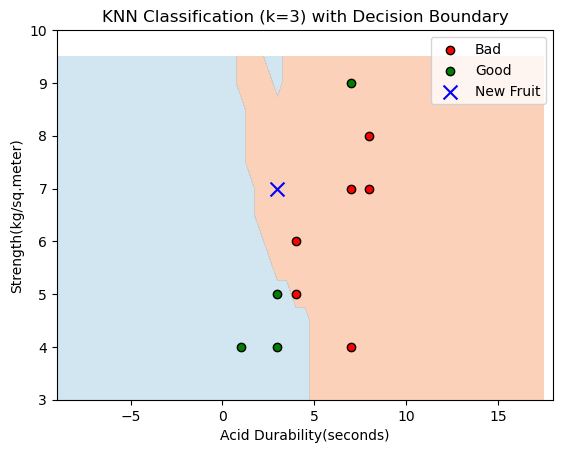


Distance Comparisons:
Acid 1: Euclidean: 4.00, Manhattan: 4.00, Minkowski (p=3): 4.00
Acid 2: Euclidean: 5.00, Manhattan: 7.00, Minkowski (p=3): 4.50
Acid 3: Euclidean: 3.00, Manhattan: 3.00, Minkowski (p=3): 3.00
Acid 4: Euclidean: 3.61, Manhattan: 5.00, Minkowski (p=3): 3.27
Acid 5: Euclidean: 2.24, Manhattan: 3.00, Minkowski (p=3): 2.08
Acid 6: Euclidean: 2.00, Manhattan: 2.00, Minkowski (p=3): 2.00
Acid 7: Euclidean: 1.41, Manhattan: 2.00, Minkowski (p=3): 1.26
Acid 8: Euclidean: 5.00, Manhattan: 5.00, Minkowski (p=3): 5.00
Acid 9: Euclidean: 4.47, Manhattan: 6.00, Minkowski (p=3): 4.16
Acid 10: Euclidean: 5.10, Manhattan: 6.00, Minkowski (p=3): 5.01


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

# Dataset of fruits
X = np.array([
    [7, 7],  # Bad
    [7, 4],  # Bad
    [3, 4],  # Good
    [1, 4],  # Good
    [4, 5],  # Bad
    [3, 5],  # Good
    [4, 6],  # Bad
    [8, 7],  # Bad
    [7, 9],  # Good
    [8, 8]   # Bad
])

y = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0])  # 0 for Bad, 1 for Good

# New instance data
new_instance = np.array([[3, 7]])

# KNN Classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict the label for the new instance
predicted_label = knn.predict(new_instance)
acid_label = 'Bad' if predicted_label == 0 else 'Good'
print(f"The new instance is classified as: {acid_label}")

# Mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

# Predict for every point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, levels=1, cmap=plt.cm.RdYlBu)

# Plot the acids
for i, label in enumerate(y):
    if label == 0:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Bad' if i == 0 else "", edgecolors='k')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='green', label='Good' if i == 2 else "", edgecolors='k')

# Mark the new instance
plt.scatter(new_instance[0, 0], new_instance[0, 1], color='blue', label='New Fruit', marker='x', s=100, edgecolors='k')

# Configure plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Acid Durability(seconds)')
plt.ylabel('Strength(kg/sq.meter)')
plt.title(f'KNN Classification (k=3) with Decision Boundary')
plt.legend()
plt.show()

# Distance Calculation
# Calculate the distances between the new acid and all existing acids

def calculate_distances(X, new_instance):
    euclidean_dist = pairwise_distances(X, new_instance, metric='euclidean')
    manhattan_dist = pairwise_distances(X, new_instance, metric='manhattan')
    minkowski_dist = pairwise_distances(X, new_instance, metric='minkowski', p=3)

    return euclidean_dist, manhattan_dist, minkowski_dist

euclidean_dist, manhattan_dist, minkowski_dist = calculate_distances(X, new_instance)

# Compare distances
print("\nDistance Comparisons:")
for i, (euc, man, mink) in enumerate(zip(euclidean_dist, manhattan_dist, minkowski_dist)):
    print(f"Acid {i+1}: Euclidean: {euc[0]:.2f}, Manhattan: {man[0]:.2f}, Minkowski (p=3): {mink[0]:.2f}")


### Q-3.A (without sklearn)

Euclidean: 36000.00, Manhattan: 36009.00, Minkowski: 36000.00, Label: 0
Euclidean: 35000.00, Manhattan: 35007.00, Minkowski: 35000.00, Label: 0
Euclidean: 12000.00, Manhattan: 12002.00, Minkowski: 12000.00, Label: 0
Euclidean: 2000.00, Manhattan: 2001.00, Minkowski: 2000.00, Label: 0
Euclidean: 21000.00, Manhattan: 21009.00, Minkowski: 21000.00, Label: 0
Euclidean: 3000.00, Manhattan: 3001.00, Minkowski: 3000.00, Label: 0
Euclidean: 29000.00, Manhattan: 29001.00, Minkowski: 29000.00, Label: 0
Euclidean: 95000.00, Manhattan: 95004.00, Minkowski: 95000.00, Label: 1
Euclidean: 22000.00, Manhattan: 22003.00, Minkowski: 22000.00, Label: 0
Euclidean: 10000.00, Manhattan: 10007.00, Minkowski: 10000.00, Label: 0
Euclidean: 25000.00, Manhattan: 25002.00, Minkowski: 25000.00, Label: 0
Euclidean: 3000.00, Manhattan: 3002.00, Minkowski: 3000.00, Label: 0
Euclidean: 31000.00, Manhattan: 31008.00, Minkowski: 31000.00, Label: 0
Euclidean: 37000.00, Manhattan: 37004.00, Minkowski: 37000.00, Label: 0
E

KeyError: 0

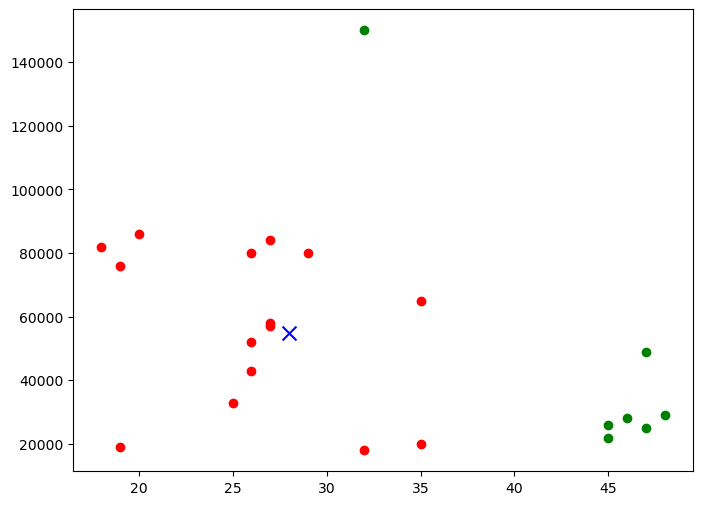

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
ages = np.array([19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32, 18, 29, 47, 45, 46, 48, 45, 47])
salaries = np.array([19000,20000,43000,57000,76000,58000,84000,150000,33000,65000,80000,52000,86000,18000,82000,80000,25000,26000,28000,29000,22000,49000])
labels = np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1])

# New features
new_instance = np.array([28, 55000])

# Function to calculate distances
def calculate_distances(ages_array, salaries_array, new_instance):
    distances = []
    for age, salary, label in zip(ages_array, salaries_array, labels):
        euclidean_distance = np.sqrt((age - new_instance[0])**2 + (salary - new_instance[1])**2)
        manhattan_distance = abs(age - new_instance[0]) + abs(salary - new_instance[1])
        minkowski_distance = (abs(age - new_instance[0])**3 + abs(salary - new_instance[1])**3)**(1/3)
        distances.append((euclidean_distance, manhattan_distance, minkowski_distance, label))
    return distances

# Calculate distances
distances = calculate_distances(ages, salaries, new_instance)

# Print distances
for d in distances:
    print(f'Euclidean: {d[0]:.2f}, Manhattan: {d[1]:.2f}, Minkowski: {d[2]:.2f}, Label: {d[3]}')

# Step 3: Determine the label for the new instance using k=3
k = 3
sorted_distances = sorted(distances, key=lambda x: x[0])  # sort by Euclidean distance
nearest_labels = [label for _, _, _, label in sorted_distances[:k]]

# Majority voting without Counter
vote_count = {}
for label in nearest_labels:
    if label in vote_count:
        vote_count[label] += 1
    else:
        vote_count[label] = 1

# Get the label with the highest count
vote = max(vote_count, key=vote_count.get)
print(f'The predicted label for the new instance is: {vote}')

# Step 4: Effect of different k values
def classify_with_k(ages_array, salaries_array, labels, new_instance, k):
    distances = calculate_distances(ages_array, salaries_array, new_instance)
    sorted_distances = sorted(distances, key=lambda x: x[0])  # sort by Euclidean distance
    nearest_labels = [label for _, _, _, label in sorted_distances[:k]]
    
    # Majority voting without Counter
    vote_count = {}
    for label in nearest_labels:
        if label in vote_count:
            vote_count[label] += 1
        else:
            vote_count[label] = 1

    vote = max(vote_count, key=vote_count.get)
    return vote

print(f'Predicted label with k=1: {classify_with_k(ages, salaries, labels, new_instance, 1)}')
print(f'Predicted label with k=1: {classify_with_k(ages, salaries, labels, new_instance, 3)}')
print(f'Predicted label with k=1: {classify_with_k(ages, salaries, labels, new_instance, 5)}')


# Step 5: Plotting the samples and decision boundary
plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'green', 'New Instance': 'blue'}

# Plot existing data
for age, salary, label in zip(ages, salaries, labels):
    plt.scatter(age, salary, color=colors[label])

# Plot the new instance
plt.scatter(new_instance[0], new_instance[1], color='blue', marker='x', s=100, label='New Instance')

# Decision boundary - Create a grid
x_min, x_max = 130, 220
y_min, y_max = 2, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.5))

# Convert labels to numerical values for the decision boundary
label_to_num = {'Not purchased': 0, 'Purchased': 1}
Z = np.array([classify_with_k(ages, salaries, labels, np.array([x, y]), k) for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z_numeric = np.array([label_to_num[label] for label in Z])

# Reshape the Z array for contour plotting
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_numeric, alpha=0.2, cmap='coolwarm')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('KNN Classification of Customers')

# Custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Not purchased'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Purchased'),
    plt.Line2D([0], [0], marker='x', color='b', markerfacecolor='blue', markersize=10, label='New Instance')
]
plt.legend(handles=handles)

plt.show()


### Q-3.B (with sklearn)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

# Dataset of fruits
X = np.array([
    [19, 19000],  
    [35, 20000],  
    [26, 43000],  
    [27, 57000],  
    [19, 76000],  
    [27, 58000],
    [27, 84000],
    [32, 150000],
    [25, 33000],
    [35, 65000],
    [26, 80000],
    [26, 52000],
    [20, 86000],
    [32, 18000],
    [18, 82000],
    [29, 80000],
    [47, 25000],
    [45, 26000],
    [46, 28000],
    [48, 29000],
    [45, 22000],
    [47,49000]
])

y = np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1])

# New data
new_instance = np.array([[28, 55000]])

# KNN Classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict the label for the new fruit
predicted_label = knn.predict(new_instance)
cust_label = 'Not Purchased' if predicted_label == 0 else 'Purchased'
print(f"The new instance is classified as: {cust_label}")

# Mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

# Predict for every point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, levels=1, cmap=plt.cm.RdYlBu)

# Plot the data
for i, label in enumerate(y):
    if label == 0:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Not Purchased' if i == 0 else "", edgecolors='k')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='green', label='Purchased' if i == 2 else "", edgecolors='k')

# Mark the new instance
plt.scatter(new_instance[0, 0], new_instance[0, 1], color='blue', label='New Instance', marker='x', s=100, edgecolors='k')

# Configure plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title(f'KNN Classification (k=3) with Decision Boundary')
plt.legend()
plt.show()

# Distance Calculation
# Calculate the distances between the new instance and all existing data

def calculate_distances(X, new_instance):
    euclidean_dist = pairwise_distances(X, new_instance, metric='euclidean')
    manhattan_dist = pairwise_distances(X, new_instance='manhattan')
    minkowski_dist = pairwise_distances(X, new_instance='minkowski', p=3)

    return euclidean_dist, manhattan_dist, minkowski_dist

euclidean_dist, manhattan_dist, minkowski_dist = calculate_distances(X, new_instance)

# Compare distances
print("\nDistance Comparisons:")
for i, (euc, man, mink) in enumerate(zip(euclidean_dist, manhattan_dist, minkowski_dist)):
    print(f"Customer{i+1}: Euclidean: {euc[0]:.2f}, Manhattan: {man[0]:.2f}, Minkowski (p=3): {mink[0]:.2f}")


The new instance is classified as: Not Purchased
